In [1]:
import librosa
import numpy as np
import os

import metrics

In [3]:
metrics.main(down_scheme = ['d'], a = ['audiounet.2.IEEE', 'proposed.16.IEEE', 'proposed.17.LIBRI'])

audiounet.2.IEEE    IEEE-d         24.636415021718832       22.50547837155288        1.8671040534973145       3.5866304768456354       
audiounet.2.IEEE    LIBRI-d        19.50464961339368        16.14470811244417        1.8999086618423462       3.3832872104098777       
audiounet.2.IEEE    TIMIT-d        17.777782605856174       16.030971611535918       1.7952102422714233       3.360872805118561        
audiounet.2.IEEE    WSJ-d          13.67679605883229        9.942934097385304        2.08465838432312         2.985686713283146        
proposed.16.IEEE    IEEE-d         21.949551772988123       14.092530422957418       1.5368964672088623       2.0696795599328146       
proposed.16.IEEE    LIBRI-d        15.600273589789944       7.091378351006834        1.4996719360351562       1.6024696113044068       
proposed.16.IEEE    TIMIT-d        14.173717897216184       8.64848934546663         1.4394563436508179       1.7464276049286127       
proposed.16.IEEE    WSJ-d          8.99875864329

In [12]:
for i in range(20):
    path = r"D:\Audio-Kuleshov\src\checkpoints\proposed.1.T_PCM\eval\TIMIT_test_on_MIR\MIR{}".format(i)
    wavlist = find_wavs(path)
    SNR1, SNR2, LSD, PESQ=list(), list(), list(), list()
    for super_path in wavlist:
        ####### generate_path ##########
        high_path = find_high_path(super_path)
        #print(high_path)
        ######### load audio ##########
        High, fs = librosa.load(high_path, sr=16000)
        Super, fs = librosa.load(super_path, sr=16000)
        MIN = min(len(High),len(Super))
        High = High[:MIN]
        Super = Super[:MIN]
        ######### cumpute ############
        temp_snr1, temp_snr2, temp_lsd, temp_pesq = metrics.get_scores(High, Super)
        SNR1.append(temp_snr1)
        SNR2.append(temp_snr2)
        LSD.append(temp_lsd)
        PESQ.append(temp_pesq)
    print("{:<30}{:<8}{:<20}{:<20}{:<20}{:<20}".format('proposed.1.T_PCM','MIR{}'.format(i),np.mean(SNR2),np.mean(SNR1),np.mean(LSD),np.mean(PESQ)))

proposed.1.T_PCM              MIR0    13.091817506342148  14.450626295774834  1.524953842163086   2.626267200956742   
proposed.1.T_PCM              MIR1    11.724557845824593  12.042448647862733  1.6156972646713257  2.4953988898884165  
proposed.1.T_PCM              MIR2    10.7099048144154    10.211695570222286  1.6445962190628052  2.3114912106345096  
proposed.1.T_PCM              MIR3    10.048122224393836  9.718408376847615   1.647243618965149   2.351893639191985   
proposed.1.T_PCM              MIR4    9.89531666108646    10.233296034283455  1.6579118967056274  2.3690258556356034  
proposed.1.T_PCM              MIR5    8.373767385961981   6.863970985807241   1.5594221353530884  2.132143814737598   
proposed.1.T_PCM              MIR6    12.507360820923685  11.061876216415817  1.4846426248550415  2.306929018969337   
proposed.1.T_PCM              MIR7    11.7931505711785    13.272770208901127  1.6347790956497192  2.5083280000835657  
proposed.1.T_PCM              MIR8    12.3182996

NameError: name 'SNR' is not defined

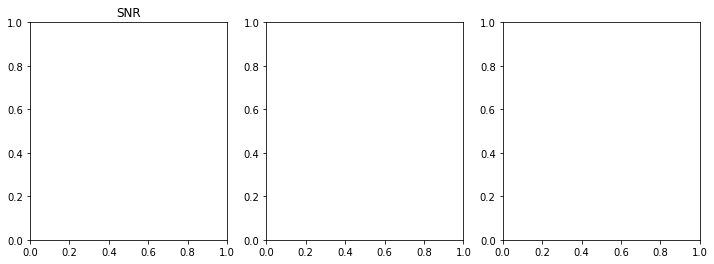

In [2]:
import matplotlib.pyplot as plt


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(12, 4))

ax0.set_title('SNR')
ax0.plot(SNR)
ax0.set_ylim([-10, 35])

ax1.set_title('LSD')
ax1.plot(LSD)
ax1.set_ylim([0, 2])

ax2.set_title('PESQ')
ax2.plot(PESQ)
ax2.set_ylim([1.04, 4.64])

#fig.suptitle('The Three Metrics for **')
plt.savefig('save.jpg')
plt.show()